# EMG_Analysis
You have been provided with a data file in Blackboard named "<font color=red>**Toy_Dataset.csv**</font>". Please, use the dataset and try the perform the following operations



In [2]:
# Ernesto Hernandez-Hinojosa RJI284
#Import Libraries
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
# inline plotting in jupyter notebook
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Import all data files and save in dictionary called "d"

import glob, os
d={}
k=1
for infile in sorted(glob.glob('*.txt')):
    print ("Current File Being Processed is: " + infile)
    d["d{0}".format(k)]= np.genfromtxt(infile, skip_header = 1)
    
    k+=1


    

Current File Being Processed is: 01.txt
Current File Being Processed is: 02.txt
Current File Being Processed is: 03.txt
Current File Being Processed is: 04.txt
Current File Being Processed is: 05.txt
Current File Being Processed is: 06.txt
Current File Being Processed is: 07.txt
Current File Being Processed is: 08.txt
Current File Being Processed is: 09.txt
Current File Being Processed is: 10.txt
Current File Being Processed is: 11.txt
Current File Being Processed is: 12.txt
Current File Being Processed is: 13.txt
Current File Being Processed is: 14.txt
Current File Being Processed is: 15.txt
Current File Being Processed is: 16.txt
Current File Being Processed is: 17.txt
Current File Being Processed is: 18.txt
Current File Being Processed is: 19.txt
Current File Being Processed is: 20.txt
Current File Being Processed is: 21.txt
Current File Being Processed is: 22.txt
Current File Being Processed is: 23.txt
Current File Being Processed is: 24.txt
Current File Being Processed is: 25.txt


In [4]:
print(Data)

NameError: name 'Data' is not defined

In [30]:
#Insert a column with an identifier number > 0 to differentiate between gesture changes

for j in range (1,73):
    
    Data=np.insert(d["d{0}".format(j)],10,0,axis=1)
    #print(np.size(Data,0))
    
    #print(Data)
    counter = 1
    ges = 0
    h=0
    for i in range(0,(np.size(Data,0))):
        if Data[i,9]==ges:
            ges=ges
            counter = counter
        else :
            ges = Data[i,9]
            counter+=1
        Data[i,10]=counter
        
        
    d["d{0}".format(j)]=Data
    #print(Data[i,:])
print(i)
print(j)
print(counter)
print(d["d{0}".format(j)])
print(Data[0,:])
    
    
    




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
49363
72
25
[[ 1.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 [ 5.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 [ 6.0000e+00 -1.0000e-05  0.0000e+00 ... -1.0000e-05  0.0000e+00
   1.0000e+00]
 ...
 [ 5.0964e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]
 [ 5.0965e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]
 [ 5.0966e+04  1.0000e-05 -1.0000e-05 ...  2.0000e-05  0.0000e+00
   2.5000e+01]]
[ 1.e+00 -1.e-05  0.e+00 -4.e-05 -4.e-05  2.e-05  1.e-05 -1.e-05 -1.e-05
  0.e+00  1.e+00]


In [31]:
#print(Data[np.size(Data,0)-1,:])
Bata=(d["d{0}".format(72)])
print(Bata[0,:])

maxx=Bata.max(axis=0)
print(maxx)
maxxx=maxx[10]
print(maxxx)

[ 1.e+00 -1.e-05  0.e+00 -4.e-05 -4.e-05  2.e-05  1.e-05 -1.e-05 -1.e-05
  0.e+00  1.e+00]
[5.0966e+04 1.1900e-03 4.3000e-04 4.8000e-04 8.7000e-04 1.2700e-03
 9.0000e-04 7.6000e-04 6.3000e-04 6.0000e+00 2.5000e+01]
25.0


In [56]:

G = 24; #gesture to be imported
ma=100; #set the moving average length
j=1
k=1
l=1
#x1={}
#xm1={}
#xma1={}
#t1={}
#t1a={}
#x2={}
#x2m={}
#emgc1={}
#emgc1m={}
#xx1 = [[None],[None]]
#xxm1 = [[None],[None]]
#xxma1 = [[None],[None]]
#tt1 = [[None],[None]]
#tt1a = [[None],[None]]
emgo=[]  #offset emg
emg= []  #mean corrected emg
emgm=[]   # mean corrected emg including ma values before #
time=[]
timem=[]

for j in range (1,73):
    emgo.append([])
    emg.append([])
    emgm.append([])
    time.append([])
    timem.append([])
    Data = d["d{0}".format(j)]
    mx = Data.max(axis=0)
    maxx=mx[10]
    maxx=maxx.astype(int)
    G=2;
    for k in range (1,maxx):
        emgo[j-1].append([])
        emg[j-1].append([])
        emgm[j-1].append([])
        time[j-1].append([])
        timem[j-1].append([])
        
        #xx1[j][k]= Data[Data[:,10]==G]  #import all columns in rows with G value in column 11 (10)
        #d["x1{1}".format(j,k)]= Data[Data[:,10]==G]  #import all columns in rows with G value in column 11 (10)
        x1=Data[Data[:,10]==G]
        #xx1=[zeros(np.size(x1,0),np.size(x1,1))][]
        #xx1.append[[i][j]]=x1
        #xxm1[j][k]=Data[Data[:,10]==G-1]
        #d["xm1{0}".format(j,k)]= Data[Data[:,10]==G-1] #import all columns in rows with G-1 value
        x1m1=Data[Data[:,10]==G-1]
        #xma1[j][k]
        #d["xma1{0}".format(j,k)]= np.vstack((x1m1[-ma:-1],x1)) #add rows before x1 to account for moving average
        x1ma = np.vstack((x1m1[-ma:-1],x1))
        #tt1[j][k]=x1[:,0]
        #d["t1{0}".format(j,k)]= x1[:,0]
        time1 = x1[:,0]
        #ttia[j][k]= x1ma[:,0]
        #d["t1a{0}".format(j).format(k)] = x1ma[:,0]
        time1ma = x1ma[:,0]
        time[j-1][k-1]=x1[:,0]
        timem[j-1][k-1]=x1ma[:,0]
        
        for l in range (1,8+1):  # Cycle through every channel
            emgo[j-1][k-1].append([])
            emg[j-1][k-1].append([])
            emgm[j-1][k-1].append([])
            d["x2{0}".format(j,k,l)]  = x1[:,l]
            x11 = x1[:,l]
            d["x2m{0}".format(j,k,l)]  = x1ma[:,l]
            x11ma=x1ma[:,l]
            d["emgc1{0}".format(j,k,l)]  = x11-np.mean(x11)
            d["emgc1m{0}".format(j,k,l)]  = x11ma-np.mean(x11ma)
            emgo[j-1][k-1][l-1] = x11
            emg[j-1][k-1][l-1]=x11-np.mean(x11)              #store the emg data starting from #2
            emgm[j-1][k-1][l-1]=x11ma-np.mean(x11ma)    # store moving average emg starting from #2-ma
           
        G+=1
   
            
        
        
        
        # x1 = Data[Data[:,10]==G]  #import all columns in rows with G value in column 11 (10)
        # print(x1[4,:])
        # x1m1 = Data[Data[:,10]==G-1] #import all columns in rows with G-1 value
        # x1ma=np.vstack((x1m1[-ma:-1],x1)) #add rows before x1 to account for moving average
        #x1 = np.absolute(x1)
        # print(x1)
        #x1_int=np.trapz(x1[:,1],x1[:,0])
        #print(x1_int)
        # time1 = x1[:,0]
        # time1ma = x1ma[:,0]
        # x11=x1[:,1]
        # x11ma = x1ma[:,1]
        # print(time1)
        # emg_correction11 = x11-np.mean(x11)
        # emg_correction11ma = x11ma-np.mean(x11ma)










here
[-2.e-05  1.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05
  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05  2.e-05
  2.e-05]


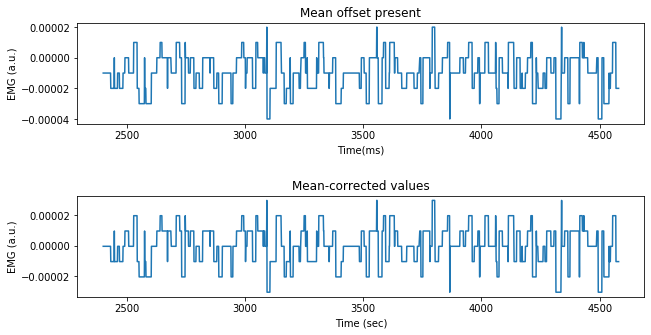

In [57]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Mean offset present')
plt.plot(time[0][0], emgo[0][0][0])
plt.xlabel('Time(ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Mean-corrected values')
plt.plot(time[0][0], emg[0][0][0])
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig2.png'
fig.set_size_inches(w=10,h=5)

print('here')

print(x11[-20:-1])



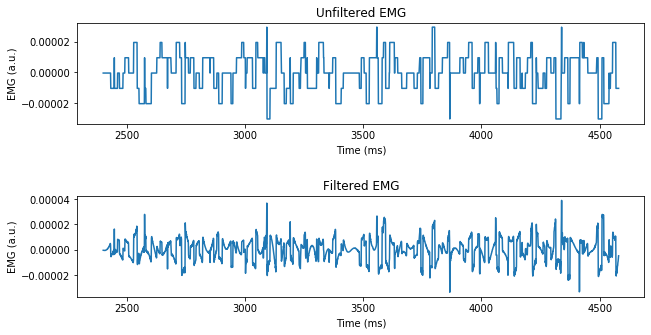

In [58]:
import scipy as sp
from scipy import signal

#create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2) #divide by two because this is the Nyquist frequency
# Design an Nth order Butterworth filter and return the filter coefficients (B,A) form. 
# 4th order Butterworth filters are quite common
b, a = sp.signal.butter(4, [high, low], btype='bandpass')
emg_filtered=[]
emg_filteredma=[]
for i in range (1,73):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    #maxx=len(emg[i])
    maxx=mx[10]
    maxx=maxx.astype(int)
    emg_filtered.append([])
    emg_filteredma.append([])
    # process EMG signal: filter EMG
    for j in range (1, maxx):
        emg_filtered[i-1].append([])
        emg_filteredma[i-1].append([]) 
        for k in range (1,8+1):
            
            emg_filtered[i-1][j-1].append([])
            emg_filteredma[i-1][j-1].append([]) 
            ee=emg[i-1][j-1][k-1]
            eem=emgm[i-1][j-1][k-1]
            emg_filtered[i-1][j-1][k-1] = sp.signal.filtfilt(b,a, ee)
            emg_filteredma[i-1][j-1][k-1] = sp.signal.filtfilt(b,a, eem)

# plot comparison of unfiltered vs filered mean-corrected EMG
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unfiltered EMG')
plt.plot(time[0][0], emg[0][0][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Filtered EMG')
plt.plot(time[0][0], emg_filtered[0][0][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=10,h=5)

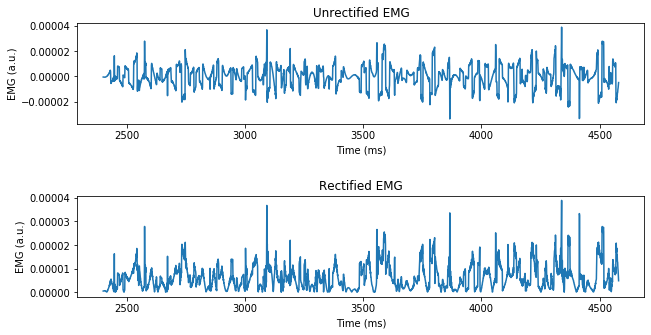

In [59]:
# process EMG signal: rectify

emg_rectified=[]
emg_rectifiedma=[]
for i in range (1,73):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    #maxx=len(emg[i])
    maxx=mx[10]
    maxx=maxx.astype(int)
    emg_rectified.append([])
    emg_rectifiedma.append([])
    # process EMG signal: filter EMG
    for j in range (1, maxx):
        emg_rectified[i-1].append([])
        emg_rectifiedma[i-1].append([]) 
        for k in range (1,8+1):
            
            emg_rectified[i-1][j-1].append([])
            emg_rectifiedma[i-1][j-1].append([]) 
            emg_rectified[i-1][j-1][k-1] = abs(emg_filtered[i-1][j-1][k-1])
            emg_rectifiedma[i-1][j-1][k-1] = abs(emg_filteredma[i-1][j-1][k-1])

# plot comparison of unrectfied vs rectified
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unrectified EMG')
plt.plot(time[0][0], emg_filtered[0][0][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Rectified EMG')
plt.plot(time[0][0], emg_rectified[0][0][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=10,h=5)



In [60]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


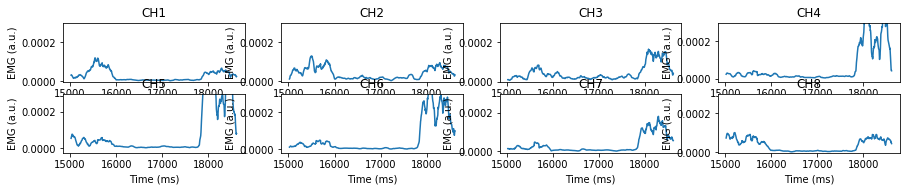

In [131]:


#ma_11 = np.append([a[0:ma-1]],[ma_11[:]])
mavg=[]

for i in range (1,73):
    Data = d["d{0}".format(i)]
    mx = Data.max(axis=0)
    #maxx=len(emg[i])
    maxx=mx[10]
    maxx=maxx.astype(int)
    mavg.append([])
    for j in range (1, maxx):
        mavg[i-1].append([])
        for k in range (1,8+1):
            
            mavg[i-1][j-1].append([])
            mavg[i-1][j-1][k-1] = moving_average(emg_rectifiedma[i-1][j-1][k-1], ma)
            


"""

fig = plt.figure()
plt.plot(time[0][22], mavg[0][22][0])
fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=10,h=5)"""

p=5  #Gesture change
q=0 #Subject

fig = plt.figure()
plt.subplot(4,4,1)
plt.subplot(4,4,1).set_title('CH1')
plt.plot(time[q][p], mavg[q][p][0])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,2)
plt.subplot(4,4,2).set_title('CH2')
plt.plot(time[q][p], mavg[q][p][1])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,3)
plt.subplot(4,4,3).set_title('CH3')
plt.plot(time[q][p], mavg[q][p][2])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,4)
plt.subplot(4,4,4).set_title('CH4')
plt.plot(time[q][p], mavg[q][p][3])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,5)
plt.subplot(4,4,5).set_title('CH5')
plt.plot(time[q][p], mavg[q][p][4])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,6)
plt.subplot(4,4,6).set_title('CH6')
plt.plot(time[q][p], mavg[q][p][5])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,7)
plt.subplot(4,4,7).set_title('CH7')
plt.plot(time[q][p], mavg[q][p][6])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

plt.subplot(4,4,8)
plt.subplot(4,4,8).set_title('CH8')
plt.plot(time[q][p], mavg[q][p][7])
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')
plt.ylim(top=0.0003)

#fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=15,h=5)





In [46]:
print(emgo[0][1][5])
print(time[0][1])


[1.0e-05 1.0e-05 1.0e-05 ... 3.9e-04 3.9e-04 3.9e-04]
[4581. 4582. 4583. ... 6658. 6659. 6660.]


0.00012717923214836045
[ 172  284  672  877 1117 1271 1438 1710]
8
0.00027665057898307587


array([112, 388, 205, 240, 154, 167, 272], dtype=int64)

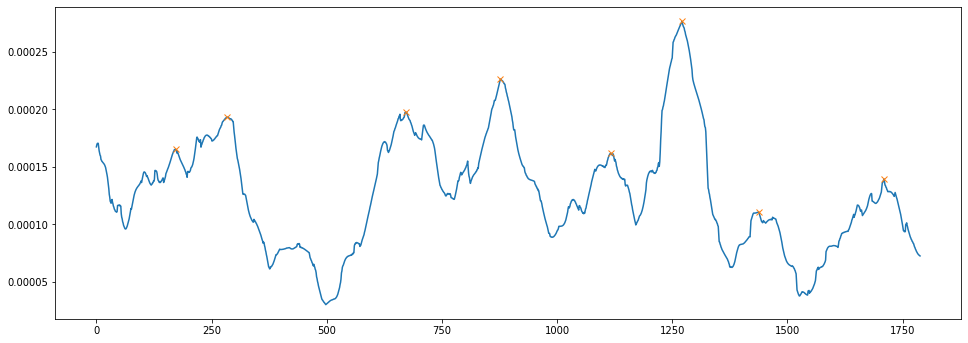

In [240]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

peaks_ma,properties =find_peaks(ma_11, height=[0.0001,0.0006], width = 20)

fig = plt.figure()
plt.plot(ma_11)
plt.plot(peaks_ma, ma_11[peaks_ma], "x")
fig.tight_layout()
fig_name = 'fig6.png'
fig.set_size_inches(w=15,h=5)

mean_ma11 = np.average(ma_11)
print(mean_ma11)
print(peaks_ma)

num_peaks = np.size(peaks_ma)
print(num_peaks)

max_peak = properties["peak_heights"].max()
print(max_peak)

#spcing 
peak_dist = np.ediff1d(peaks_ma)

peak_dist


In [166]:
#Find peak width 
results_half = peak_widths(ma_11, peaks_ma, rel_height=0.0001)
results_half[0] #widths 
results_full = peak_widths(ma_11, peaks_ma, rel_height=0.0005)
results_full[0] #widths 


array([0.00197469, 0.00113662, 0.00094187, 0.00297422, 0.00095799,
       0.00056369, 0.01069307, 0.00050396, 0.19036921, 0.00070568,
       0.00060705, 0.00063023])

In [167]:
results_half[0]

array([0.00039494, 0.00022732, 0.00018837, 0.00059484, 0.0001916 ,
       0.00011274, 0.00213861, 0.00010079, 0.03807384, 0.00014114,
       0.00012141, 0.00012605])

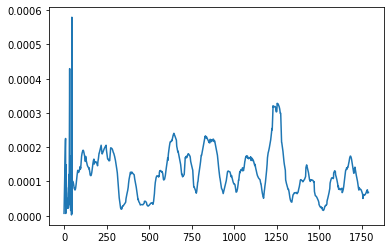

In [160]:
plt.plot(ma_11)
#plt.plot(peaks_ma, ma_11[peaks_ma], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()